## Quanto tempo para terminar o jogo?

## Qual a probabilidade dessa situação atual do jogo ser real? E não ser fabricada manualmente (= roubada)

In [ ]:
import numpy as np

# another approach is to use a set with the MARKED positions
# card_positions = [4,8,12,16,19,25,30,33,36,41,44,47]

board = [0] * 52
board[4] = 1
board[8] = 1
board[12] = 1
board[16] = 1
board[19] = 1
board[25] = 1
board[30] = 1
board[33] = 1
board[36] = 1
board[41] = 1
board[44] = 1
board[47] = 1
board = np.array(board)

In [ ]:
# two variations

BALANCED_CARDS = [ -6,-5,-4,-3,-2,-1,1,2,3,4,5,6]
SLOW_CARDS = [-6,-5,-4,-3,-2,-1]
ORIGINAL_CARDS = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 3, 4, 6]

In [ ]:
# regra assumida: quando você pega uma carta e usa, ela volta pra pilha, EMBARALHADA

In [ ]:
DICE_FACES = 4

In [ ]:
np.random.seed(43354)

class Game:
  def __init__(self, players, board, player_time, cards = None):
    self.players = players
    self.board = board
    self.cards = cards
    if not self.cards:
      self.cards = []
    # current_player pode ser calculado atraves do turno
    self.current_player = 0
    self.turn = 1
    self.player_position = np.array([0, 0])
    self.player_time = player_time
    self.current_time = 0
    self.red_turns = 0
    self.bonus_movements = 0

  def limit(self, position):
    return  min((len(self.board)-1), max(0, position))

  def next_turn(self):

    dice = np.random.choice(DICE_FACES) + 1
    self.current_time += self.player_time[self.current_player]

    position = self.limit(self.player_position[self.current_player] + dice)
    while board[position] == 1 and len(self.cards) > 0:
      card = np.random.choice(self.cards)
      self.bonus_movements += card
      self.red_turns += 1
      position = self.limit(position + card)

    self.player_position[self.current_player] = position

    if position >= len(self.board) - 1:
      return False

    self.current_player = (self.current_player + 1) % self.players
    self.turn += 1
    return True


In [ ]:
# o tempo em funcao do numero de jogadores?

def simulate(player_time, cards=None):
  game = Game(2, board, player_time=player_time, cards=cards)
  while game.next_turn():
    pass
  return [game.current_time / 60.0, game.current_player, game.turn, game.player_position, game.red_turns, game.bonus_movements]
simulate([5,30])

[11.083333333333334, 1, 38, array([42, 51]), 0, 0]

In [ ]:
from tqdm import tqdm


In [ ]:
import pandas as pd

np.random.seed(43278)
results = [simulate([5,30]) for i in tqdm(range(10000))]
results = pd.DataFrame(results, columns=["time", "player", "turn", "positions", "red_turns", "bonus_movements"])
results.head()

100%|██████████| 10000/10000 [00:03<00:00, 3127.71it/s]


,time,player,turn,positions,red_turns,bonus_movements
0,11.666667,1,40,"[43, 51]",0,0
1,11.083333,1,38,"[48, 51]",0,0
2,9.416667,0,33,"[51, 35]",0,0
3,10.583333,0,37,"[51, 46]",0,0
4,10.583333,0,37,"[51, 43]",0,0


In [ ]:
results.mean()

time                          11.1873
player                         0.4179
turn                          38.7721
positions          [48.7184, 47.2275]
red_turns                           0
bonus_movements                     0
dtype: object

## O jogador inicial tem vantagem!

## Em média vão ser 38.7 jogadas e 11 minutos. Mas não existe 38.7 jogadas!

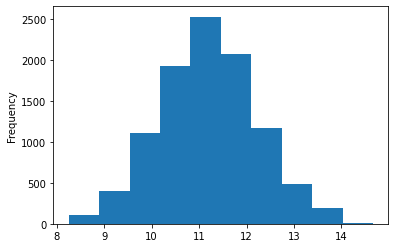

In [ ]:
results['time'].plot(kind='hist')

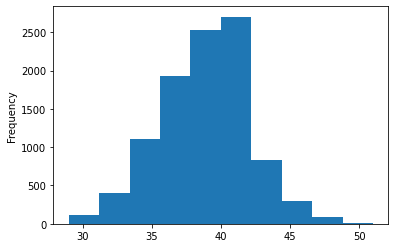

In [ ]:
results['turn'].plot(kind='hist')

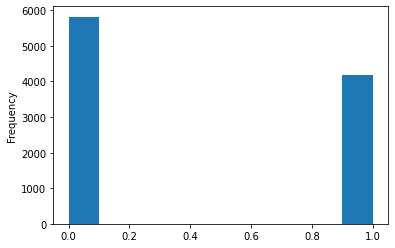

In [ ]:
results['player'].plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt

def run_simulation_for(player_time, cards=None, plot = True, describe=True):
  np.random.seed(574983)
  results = [simulate(player_time, cards=cards) for i in tqdm(range(10000))]
  results = pd.DataFrame(results, columns=["time", "player", "turn", "positions", "red_turns", "bonus_movements"])

  if plot:
    results['player'].plot(kind='hist')
    plt.show()
    results['turn'].plot(kind='hist')
    plt.show()
    results['time'].plot(kind='hist')
    plt.show()
  if describe:
    display(results.describe())
  return results

100%|██████████| 10000/10000 [00:03<00:00, 3234.01it/s]


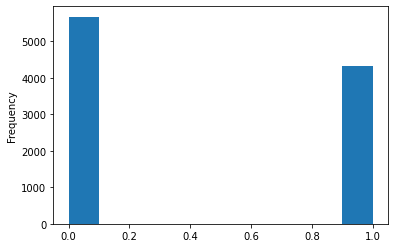

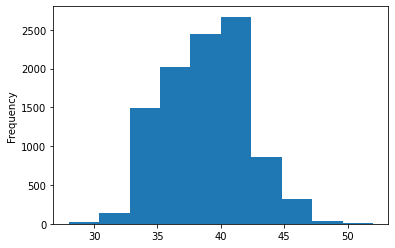

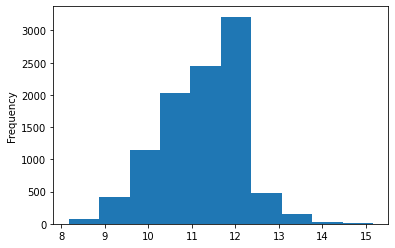

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,11.176942,0.432500,38.726300,0.0,0.0
std,0.938455,0.495448,3.172412,0.0,0.0
min,8.166667,0.000000,28.000000,0.0,0.0
25%,10.583333,0.000000,37.000000,0.0,0.0
50%,11.166667,0.000000,39.000000,0.0,0.0
75%,11.750000,1.000000,41.000000,0.0,0.0
max,15.166667,1.000000,52.000000,0.0,0.0


In [ ]:
run_simulation_for([5,30]);

In [ ]:
np.array(ORIGINAL_CARDS).mean()

-0.16666666666666666

In [ ]:
run_simulation_for([30,5], plot=False);

100%|██████████| 10000/10000 [00:03<00:00, 3290.87it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,11.413400,0.432500,38.726300,0.0,0.0
std,0.923537,0.495448,3.172412,0.0,0.0
min,8.166667,0.000000,28.000000,0.0,0.0
25%,11.000000,0.000000,37.000000,0.0,0.0
50%,11.583333,0.000000,39.000000,0.0,0.0
75%,12.166667,1.000000,41.000000,0.0,0.0
max,15.166667,1.000000,52.000000,0.0,0.0


In [ ]:
run_simulation_for([5,30], cards=ORIGINAL_CARDS, plot=False);

100%|██████████| 10000/10000 [00:04<00:00, 2468.20it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.676300,0.466400,36.985600,12.368700,-2.098200
std,1.852329,0.498895,6.324602,4.260044,13.321513
min,4.750000,0.000000,17.000000,2.000000,-70.000000
25%,9.416667,0.000000,33.000000,9.000000,-11.000000
50%,10.583333,0.000000,37.000000,12.000000,-1.000000
75%,11.750000,1.000000,41.000000,15.000000,7.000000
max,19.250000,1.000000,66.000000,33.000000,42.000000


In [ ]:
run_simulation_for([5,30], cards=BALANCED_CARDS, plot=False);

100%|██████████| 10000/10000 [00:03<00:00, 2564.10it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,10.408208,0.475400,36.06000,11.787700,-0.023500
std,1.844542,0.499419,6.29814,4.103646,13.246482
min,4.666667,0.000000,16.00000,2.000000,-66.000000
25%,9.333333,0.000000,32.00000,9.000000,-8.000000
50%,10.500000,0.000000,36.00000,11.000000,1.000000
75%,11.666667,1.000000,40.00000,14.000000,9.000000
max,20.500000,1.000000,71.00000,34.000000,40.000000


In [ ]:
run_simulation_for([5,30], cards=SLOW_CARDS, plot=False);

100%|██████████| 10000/10000 [00:06<00:00, 1505.35it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,18.386558,0.486800,63.406200,21.015400,-73.579900
std,4.697530,0.499851,16.097668,9.630672,36.248026
min,8.833333,0.000000,31.000000,1.000000,-340.000000
25%,15.166667,0.000000,52.000000,14.000000,-93.000000
50%,17.583333,0.000000,61.000000,20.000000,-67.000000
75%,21.000000,1.000000,72.000000,26.000000,-48.000000
max,52.000000,1.000000,179.000000,95.000000,-1.000000


In [ ]:
run_simulation_for([5,30], cards=[-4, -3], plot=False);

100%|██████████| 10000/10000 [00:07<00:00, 1257.36it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000
mean,21.363267,0.499200,73.603200,28.6644,-100.282
std,6.133483,0.500024,21.021235,13.5621,47.705
min,8.833333,0.000000,31.000000,0.0000,-343.000
25%,16.916667,0.000000,58.000000,19.0000,-127.000
50%,20.416667,0.000000,70.000000,27.0000,-93.000
75%,24.708333,1.000000,85.250000,36.0000,-66.000
max,57.166667,1.000000,196.000000,99.0000,0.000


In [ ]:
run_simulation_for([5,30], cards=[-4, -3, 3, 4], plot=False);

100%|██████████| 10000/10000 [00:04<00:00, 2457.08it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,10.360383,0.46060,35.906600,15.277500,-0.144300
std,1.970286,0.49847,6.732964,5.733165,14.066452
min,4.083333,0.00000,14.000000,2.000000,-76.000000
25%,8.833333,0.00000,31.000000,11.000000,-9.000000
50%,10.000000,0.00000,35.000000,15.000000,1.000000
75%,11.666667,1.00000,40.000000,19.000000,9.000000
max,19.833333,1.00000,68.000000,45.000000,49.000000


In [ ]:
run_simulation_for([5,30], cards=[3, 4], plot=False);

100%|██████████| 10000/10000 [00:02<00:00, 3923.00it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.625117,0.441800,23.113400,9.418600,32.973100
std,1.317851,0.496626,4.487511,2.554765,8.955568
min,2.416667,0.000000,9.000000,2.000000,6.000000
25%,5.833333,0.000000,20.000000,8.000000,27.000000
50%,6.500000,0.000000,23.000000,9.000000,33.000000
75%,7.583333,1.000000,26.000000,11.000000,39.000000
max,11.750000,1.000000,41.000000,19.000000,66.000000


In [ ]:
run_simulation_for([5,30], cards=[8,9], plot=False);

100%|██████████| 10000/10000 [00:01<00:00, 6010.24it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.391592,0.468400,15.436600,5.453900,46.36580
std,1.458731,0.499025,4.968687,1.367648,11.50832
min,1.250000,0.000000,5.000000,1.000000,8.00000
25%,3.500000,0.000000,12.000000,5.000000,40.00000
50%,4.166667,0.000000,15.000000,5.000000,44.00000
75%,5.333333,1.000000,19.000000,6.000000,53.00000
max,10.000000,1.000000,35.000000,10.000000,86.00000


In [ ]:
run_simulation_for([5,30], cards=[-4], plot=False);

100%|██████████| 10000/10000 [00:09<00:00, 1108.59it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.084792,0.499400,82.934000,32.831500,-131.326000
std,8.395715,0.500025,28.773061,17.157755,68.631019
min,8.833333,0.000000,31.000000,1.000000,-632.000000
25%,18.083333,0.000000,62.000000,21.000000,-168.000000
50%,22.250000,0.000000,77.000000,30.000000,-120.000000
75%,28.583333,1.000000,98.000000,42.000000,-84.000000
max,89.250000,1.000000,306.000000,158.000000,-4.000000


In [ ]:
run_simulation_for([5,30], cards=[-3], plot=False);

100%|██████████| 10000/10000 [00:07<00:00, 1381.70it/s]


,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.390700,0.479900,66.853900,26.217900,-78.653700
std,4.779167,0.499621,16.374656,12.003684,36.011052
min,9.416667,0.000000,33.000000,2.000000,-375.000000
25%,15.833333,0.000000,55.000000,17.000000,-99.000000
50%,18.708333,0.000000,64.500000,24.000000,-72.000000
75%,22.166667,1.000000,76.000000,33.000000,-51.000000
max,59.583333,1.000000,205.000000,125.000000,-6.000000


In [ ]:
player_fairness = []
for selected_card in np.linspace(-10, 10, num=21):
  selected_card = int(selected_card)
  if selected_card == 0:
    continue
  results = run_simulation_for([5,30], cards=[selected_card], plot=False, describe=False)
  player_fairness.append([selected_card, results['player'].mean(), results['turn'].mean()])

player_fairness = pd.DataFrame(player_fairness, columns=["selected_card", "fairness", "turn"])
player_fairness.head()

100%|██████████| 10000/10000 [00:01<00:00, 5944.55it/s]


,selected_card,fairness,turn
0,-10,0.5046,248.6374
1,-9,0.5012,267.6274
2,-8,0.4953,310.9885
3,-7,0.4921,126.1429
4,-6,0.4998,120.2318


(0.0, 1.0)

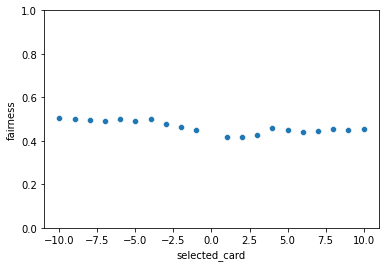

In [ ]:
import seaborn as sns

sns.scatterplot(data=player_fairness, x= "selected_card", y="fairness")
plt.ylim(0, 1)

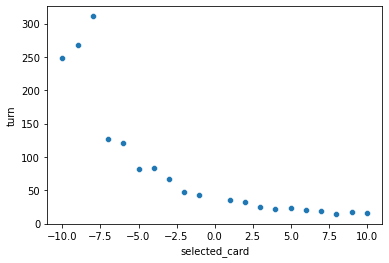

In [ ]:
sns.scatterplot(data=player_fairness, x= "selected_card", y="turn")

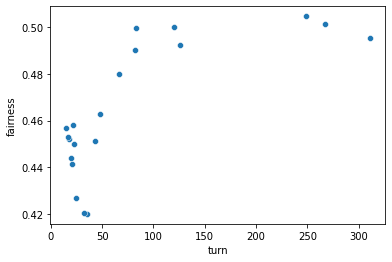

In [ ]:
sns.scatterplot(data=player_fairness, x= "turn", y="fairness")

In [ ]:
player_fairness.query("70 < turn < 100")

,selected_card,fairness,turn
5,-5,0.4901,81.6949
6,-4,0.4994,82.9340


In [ ]:
player_fairness.query("45 < turn < 60")

,selected_card,fairness,turn
8,-2,0.4629,47.6483


In [ ]:
player_fairness

,selected_card,fairness,turn
0,-10,0.5046,248.6374
1,-9,0.5012,267.6274
2,-8,0.4953,310.9885
3,-7,0.4921,126.1429
4,-6,0.4998,120.2318
5,-5,0.4901,81.6949
6,-4,0.4994,82.9340
7,-3,0.4799,66.8539
8,-2,0.4629,47.6483
9,-1,0.4514,43.2998


In [ ]:
player_fairness = []
for selected_card in np.linspace(-7, -1, num=7):
  selected_card = int(selected_card)
  if selected_card == 0:
    continue
  results = run_simulation_for([5,30], cards=[-2, selected_card, -selected_card], plot=False, describe=False)
  player_fairness.append([selected_card, results['player'].mean(), results['turn'].mean()])

player_fairness = pd.DataFrame(player_fairness, columns=["selected_card", "fairness", "turn"])
player_fairness

100%|██████████| 10000/10000 [00:04<00:00, 2423.70it/s]


,selected_card,fairness,turn
0,-7,0.4635,36.5887
1,-6,0.4839,37.8899
2,-5,0.4675,38.7809
3,-4,0.4742,39.7622
4,-3,0.4661,41.2593
5,-2,0.4521,40.8079
6,-1,0.4464,41.1016


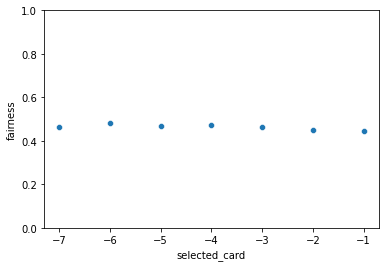

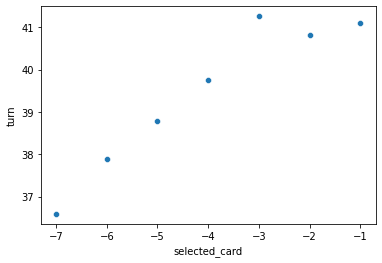

In [ ]:
sns.scatterplot(data=player_fairness, x= "selected_card", y="fairness")
plt.ylim(0, 1)
plt.show()
sns.scatterplot(data=player_fairness, x= "selected_card", y="turn")
plt.show()

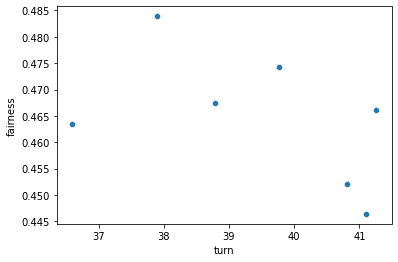

In [ ]:
sns.scatterplot(data=player_fairness, x= "turn", y="fairness")

In [ ]:
player_fairness = []
for selected_card in np.linspace(3, 5, num=3):
  selected_card = int(selected_card)
  if selected_card == 0:
    continue
  results = run_simulation_for([5,30], cards=[-2, -6, 6, selected_card, -selected_card - 2], plot=False, describe=False)
  player_fairness.append([selected_card, results['player'].mean(), results['turn'].mean()])

player_fairness = pd.DataFrame(player_fairness, columns=["selected_card", "fairness", "turn"])
player_fairness

100%|██████████| 10000/10000 [00:04<00:00, 2445.53it/s]


,selected_card,fairness,turn
0,3,0.4817,39.1407
1,4,0.4714,38.4264
2,5,0.4727,37.8969


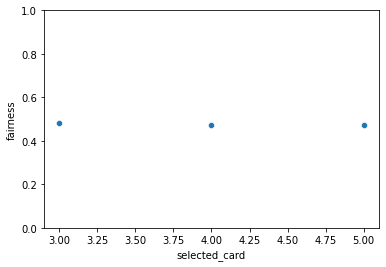

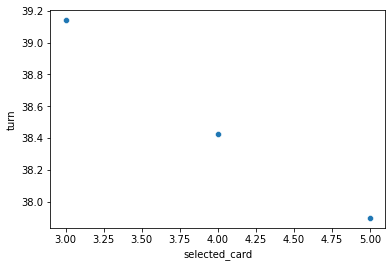

In [ ]:
sns.scatterplot(data=player_fairness, x= "selected_card", y="fairness")
plt.ylim(0, 1)
plt.show()
sns.scatterplot(data=player_fairness, x= "selected_card", y="turn")
plt.show()

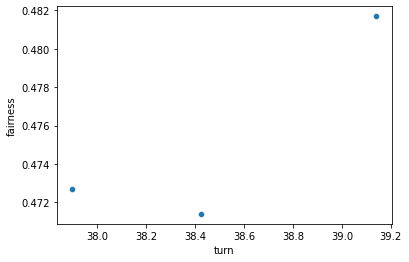

In [ ]:
sns.scatterplot(data=player_fairness, x= "turn", y="fairness")

In [ ]:
# my selection: [-2, -6, 6]

In [ ]:
run_simulation_for([5,30], cards=[-2, -6, 6, -2, -6, 6, -1, -3, 3], plot=False, describe=False).mean()


100%|██████████| 10000/10000 [00:04<00:00, 2386.38it/s]


time                          11.0425
player                         0.4737
turn                          38.2359
positions          [44.4509, 43.2909]
red_turns                     12.8867
bonus_movements               -7.1741
dtype: object

# Desafio: rodar tudo AO MESMO tempo

In [ ]:
# player_position = [0, 0]
# choices = [1,2,3,4]
# [[1,0],[2,0],[3,0],[4,0]]
# [[2,0][3,0][4,0][1,1][1,2][1,3][1,4]]
# [[3,0][4,0][1,1][1,2][1,3][1,4][2,1][2,2][2,3][2,4]]

# player_position = [[1,2] , 0, 0 ,0 ,0 ,0 ,0, 0 ]

# turn_0 = [1 0 0 0 0 0 0  0 0]
# turn_1 = [0 1/4 1/4 1/4 1/4 0 0 0 0 0 0 0 0]
# turn_2 = [0 0 1/16 2/16 3/16 4/16 3/16 2/16 1/16 0 0 0 0 0 0]

In [ ]:
1/16

0.0625

In [ ]:
board_size = 52

current_board = [0] * board_size
current_board[0] = 1
dice_possibilities = [1,2,3,4]
accepted_error = 1 / 1000000
for turn in range(15):
  next_board = [0] * 52
  for position, current_probability in enumerate(current_board):
    if current_probability <= accepted_error:
      continue
    # print(position, current_probability)
    for dice in dice_possibilities:
      new_position = min(position + dice, board_size - 1)
      dice_probability = 1 / len(dice_possibilities)
      next_probability = current_probability * dice_probability
      next_board[new_position] += next_probability
  current_board = next_board

In [ ]:
print(current_board)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.7497451305389404e-07, 2.6123598217964172e-06, 1.034419983625412e-05, 3.418419510126114e-05, 9.855721145868301e-05, 0.0002549588680267334, 0.000599939376115799, 0.0012967223301529884, 0.0025933003053069115, 0.004826076328754425, 0.008395453914999962, 0.013702507130801678, 0.0210458030924201, 0.030493447557091713, 0.041763028129935265, 0.05415312945842743, 0.0665668398141861, 0.07764674909412861, 0.08600647561252117, 0.09050756692886353, 0.09050756692886353, 0.08600647561252117, 0.07764674909412861, 0.0665668398141861, 0.05415312945842743, 0.041763028129935265, 0.030493447557091713, 0.0210458030924201, 0.013702507130801678, 0.008395453914999962, 0.004826076328754425, 0.0025933003053069115, 0.0012967223301529884, 0.0010013505816459656]


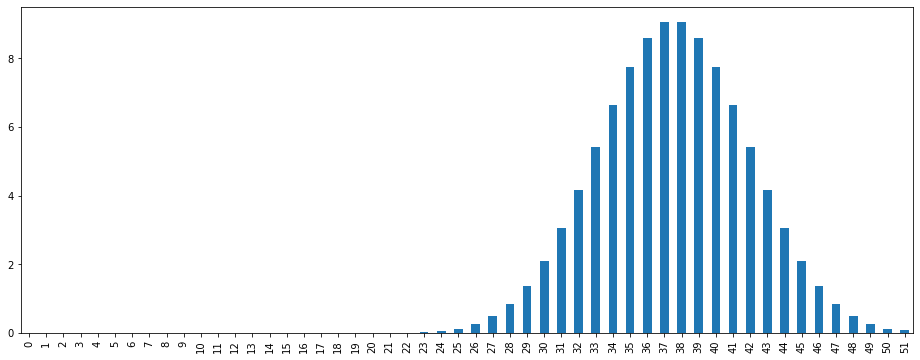

In [ ]:
import matplotlib.pyplot as plt
(pd.Series(current_board) * 100).plot(kind='bar', figsize=(16,6))

Suporte a 2 jogadores/as.

In [ ]:
current_board = np.zeros((52,52))
current_board.shape

(52, 52)

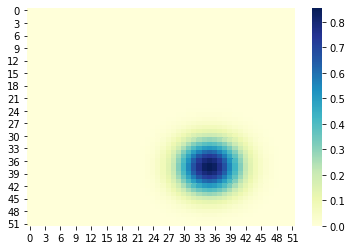

In [ ]:
import seaborn as sns
board_size = 52

player_count = 2
current_board = np.zeros((board_size, board_size))
current_board[0,0] = 1
dice_possibilities = [1,2,3,4]
dice_probability = 1 / len(dice_possibilities)
accepted_error = 1 / 1000000
for turn in range(30):
  current_player = turn % player_count
  next_board = np.zeros((board_size,board_size))
  for player_0_position in range(board_size):
    for player_1_position in range(board_size):
      positions = [player_0_position, player_1_position]
      current_probability = current_board[player_0_position, player_1_position]
      if current_probability <= accepted_error:
        continue
      # print(positions, current_probability)
      for dice in dice_possibilities:
        position = positions[current_player]
        new_position = min(position + dice, board_size - 1)
        new_positions = positions.copy()
        new_positions [current_player] = new_position
        next_probability = current_probability * dice_probability
        next_board[new_positions[0], new_positions[1]] += next_probability
        # print(f"{current_player} positions {positions} new_positions {new_positions} {next_probability}")
  current_board = next_board
  # print(current_board)
  # print(f"finished {turn}, player {current_player}")

current_board = current_board * 100
sns.heatmap(current_board, cmap="YlGnBu")

In [51]:
import numpy as np
import seaborn as sns

class Board:
  def __init__(self):
    self.board_size = 52
    self.red_triangle_positions = set([4,8,12,16,19,25,30,33,36,41,44,47])
    self.dice_possibilities = [1,2,3,4]
    self.dice_probability = 1 / len(self.dice_possibilities)
    self.cards = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 3, 4, 6]
    self.card_probability = 1 / len(self.cards)

  def is_red_triangle(self, position):
    return position in self.red_triangle_positions

  def build_clean_board(self):
    return np.zeros((self.board_size, self.board_size))

  def positions(self):
    return range(self.board_size)

  def limit(self, position):
    return max(0, min(position, self.board_size - 1))

  def has_cards(self):
    return len(self.cards) > 0

  def random_card(self):
    return np.random.choice(self.cards)

class Game:
  def __init__(self, board):
    self.player_count = 2
    self.accepted_error = 1 / 1000000000
    self.board = board
    self.current_board = self.board.build_clean_board()
    self.current_board[0,0] = 1
    self.turn = 0

  def current_player(self):
    return self.turn % self.player_count

  def next_turn(self):
    current_player = self.current_player()
    next_board = self.board.build_clean_board()
    # challenge: support more players, variable number of players
    for player_0_position in self.board.positions():
      for player_1_position in self.board.positions():
        positions = [player_0_position, player_1_position]

        current_probability = self.current_board[player_0_position, player_1_position]
        if current_probability <= self.accepted_error:
          continue
        # print(positions, current_probability)

        for dice in self.board.dice_possibilities:

          position = positions[current_player]
          after_dice_position = self.board.limit(position + dice)
          next_probability = current_probability * self.board.dice_probability

          if self.board.is_red_triangle(after_dice_position) and self.board.has_cards():
            for card in self.board.cards:
              # challenge: if you end up in a red triangle, pick all cards again
              after_card_position = self.board.limit(after_dice_position + card)
              self.add_probability(next_board, positions, after_card_position, current_player, next_probability * self.board.card_probability)
          else:
            self.add_probability(next_board, positions, after_dice_position, current_player, next_probability)

    self.current_board = next_board
    self.turn += 1
    # print(current_board)
    # print(f"finished {turn}, player {current_player}")

  def add_probability(self, next_board, positions, new_position, current_player, probability_to_add):
    new_positions = positions.copy()
    new_positions[current_player] = new_position
    next_board[new_positions[0], new_positions[1]] += probability_to_add
    # print(f"{current_player} positions {positions} new_positions {new_positions} {next_probability}")

  def plot_heat_map(self):
    board_to_print = self.current_board * 100
    sns.heatmap(board_to_print, cmap="YlGnBu")


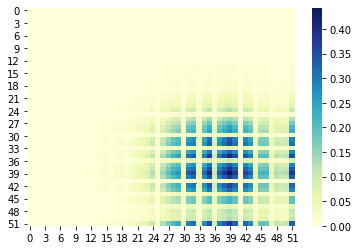

In [52]:
np.random.seed(543354)

board = Board()
game = Game(board)
for turn in range(30):
  game.next_turn()

game.plot_heat_map()

In [53]:
game.current_board[36]

array([1.19626907e-07, 9.40156395e-08, 3.47114371e-07, 5.02824393e-07,
       2.10383378e-07, 7.68070896e-07, 1.98206835e-06, 2.74157184e-06,
       9.51548400e-07, 3.96523192e-06, 8.66224039e-06, 1.16986125e-05,
       3.46733761e-06, 2.15397766e-05, 2.91447432e-05, 3.84213702e-05,
       6.29717210e-06, 4.88872741e-05, 6.10866046e-05, 3.11396146e-05,
       9.35352972e-05, 1.24649868e-04, 1.61766358e-04, 1.90544335e-04,
       3.03028281e-04, 6.24312075e-05, 3.48695468e-04, 4.71661710e-04,
       5.83609026e-04, 6.41833004e-04, 1.27447592e-04, 8.04401821e-04,
       8.66143907e-04, 1.79571438e-04, 7.74626230e-04, 9.71458618e-04,
       2.52853422e-04, 7.97495504e-04, 9.26792493e-04, 1.05740070e-03,
       9.15154819e-04, 7.50774490e-05, 8.87846112e-04, 7.82574593e-04,
       1.73896736e-04, 5.22487516e-04, 5.29025777e-04, 1.61724297e-04,
       3.18976009e-04, 2.88877368e-04, 3.14738873e-04, 9.19011655e-04])

In [54]:
game.current_board[10,20]

3.2043275512124745e-06

In [55]:
np.sum(game.current_board)

0.9999996682469262

First possibility to win after 12 turns with 0.00%.
Player 1 has finished after 96 turns with 99.9993% (not necessarily won).


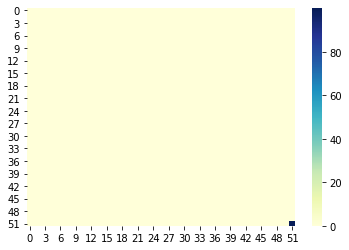

In [61]:
np.random.seed(543354)

board = Board()
game = Game(board)
max_turns = 300
has_possibily_finished = False
for turn in range(max_turns):
  game.next_turn()
  percentage = sum(game.current_board[51]) * 100
  if percentage > 0 and not has_possibily_finished:
    has_possibily_finished = True
    print(f"First possibility to win after {turn} turns with {percentage:.2f}%.")
  if 100 - percentage <= 0.001:
    print(f"Player 1 has finished after {turn} turns with {percentage:.4f}% (not necessarily won).")
    break

game.plot_heat_map()

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

class Board:
  def __init__(self):
    self.board_size = 52
    self.red_triangle_positions = set([4,8,12,16,19,25,30,33,36,41,44,47])
    self.dice_possibilities = [1,2,3,4]
    self.dice_probability = 1 / len(self.dice_possibilities)
    self.cards = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 3, 4, 6]
    self.card_probability = 1 / len(self.cards)

  def is_red_triangle(self, position):
    return position in self.red_triangle_positions

  def build_clean_board(self):
    return np.zeros((self.board_size, self.board_size))

  def positions(self):
    return range(self.board_size)

  def limit(self, position):
    return max(0, min(position, self.board_size - 1))

  def has_cards(self):
    return len(self.cards) > 0

  def random_card(self):
    return np.random.choice(self.cards)

class Game:
  def __init__(self, board):
    self.player_count = 2
    self.accepted_error = 1 / 1000000000
    self.board = board
    self.current_board = self.board.build_clean_board()
    self.current_board[0,0] = 1
    self.turn = 0
    self.board_possibilities = self.board.build_clean_board()
    self.board_possibilities[0,0] = 1

  def current_player(self):
    return self.turn % self.player_count

  def next_turn(self):
    current_player = self.current_player()
    next_board = self.board.build_clean_board()
    # challenge: support more players, variable number of players
    for player_0_position in self.board.positions():
      for player_1_position in self.board.positions():
        positions = [player_0_position, player_1_position]

        current_probability = self.current_board[player_0_position, player_1_position]
        if current_probability <= self.accepted_error:
          continue
        # print(positions, current_probability)

        for dice in self.board.dice_possibilities:

          position = positions[current_player]
          after_dice_position = self.board.limit(position + dice)
          next_probability = current_probability * self.board.dice_probability

          if self.board.is_red_triangle(after_dice_position) and self.board.has_cards():
            for card in self.board.cards:
              # challenge: if you end up in a red triangle, pick all cards again
              after_card_position = self.board.limit(after_dice_position + card)
              self.add_probability(next_board, positions, after_card_position, current_player, next_probability * self.board.card_probability)
          else:
            self.add_probability(next_board, positions, after_dice_position, current_player, next_probability)

    self.current_board = next_board
    self.turn += 1

  def add_probability(self, next_board, positions, new_position, current_player, probability_to_add):
    new_positions = positions.copy()
    new_positions[current_player] = new_position
    next_board[new_positions[0], new_positions[1]] += probability_to_add
    self.board_possibilities[new_positions[0], new_positions[1]] += 1
    # print(f"{current_player} positions {positions} new_positions {new_positions} {next_probability}")

  def plot_heat_map(self):
    board_to_print = self.current_board * 100
    sns.heatmap(board_to_print, cmap="YlGnBu")

  def plot_heat_map_for_position(self, player1, player2):
    possibilities = game.board_possibilities.copy()
    # no one has won the game so far
    possibilities[:,-1] = 0
    possibilities[-1,:] = 0
    # no one is on the first position
    possibilities[:,0] = 0
    possibilities[0,:] = 0
    probability = possibilities[player1, player2] / np.sum(possibilities) * 100
    print(f"The probability for {player1},{player2} is {probability:.2f}%")
    sns.heatmap(possibilities, cmap="YlGnBu")


  def plot_heat_map_for_position_with_one_change(self, player1, player2):
    possibilities = game.board_possibilities.copy()
    # no one has won the game so far
    possibilities[:,-1] = 0
    possibilities[-1,:] = 0
    # no one is on the first position
    possibilities[:,0] = 0
    possibilities[0,:] = 0
    y = possibilities[player1,:]
    probability = possibilities[player1,player2] / np.sum(y) * 100
    x = range(self.board.board_size)
    df = pd.DataFrame(np.array([x,y]).T, columns=["position", "possibilities"])
    display(df.head())
    plt.figure(figsize=(12,6))
    sns.barplot(data = df, x="position", y="possibilities")
    print(f"The probability for one change of {player1},{player2} is {probability:.2f}%")
    # sns.heatmap(possibilities, cmap="YlGnBu")


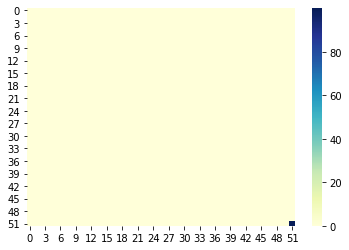

In [179]:
np.random.seed(543354)

board = Board()
game = Game(board)
for turn in range(98):
  game.next_turn()

game.plot_heat_map()

In [180]:
game.board_possibilities

array([[ 301.,  212.,  284., ...,  320.,  450.,  639.],
       [ 208.,  122.,  189., ...,  200.,  324.,  462.],
       [ 284.,  190.,  265., ...,  300.,  439.,  624.],
       ...,
       [ 339.,  216.,  321., ...,  479.,  725., 1025.],
       [ 472.,  346.,  466., ...,  719.,  967., 1345.],
       [ 671.,  497.,  667., ..., 1015., 1342., 1743.]])

In [181]:
game.board_possibilities[24, 33]

585.0

The probability for 24,33 is 0.04%


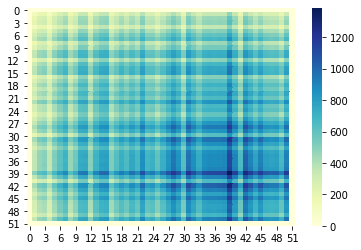

In [182]:
game.plot_heat_map_for_position(24,33)

The probability for 24,33 is 0.01%


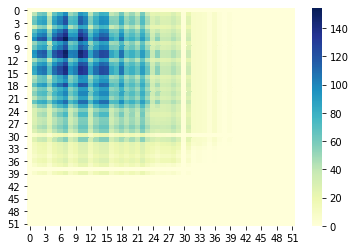

In [183]:
np.random.seed(543354)

board = Board()
game = Game(board)
for turn in range(10):
  game.next_turn()

game.plot_heat_map_for_position(24,33)

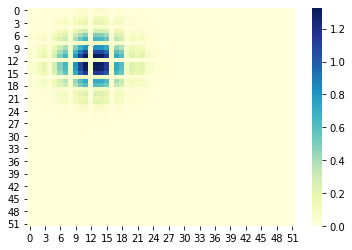

In [184]:
game.plot_heat_map()

,position,possibilities
0,0.0,0.0
1,1.0,29.0
2,2.0,39.0
3,3.0,41.0
4,4.0,27.0


The probability for one change of 24,33 is 0.61%


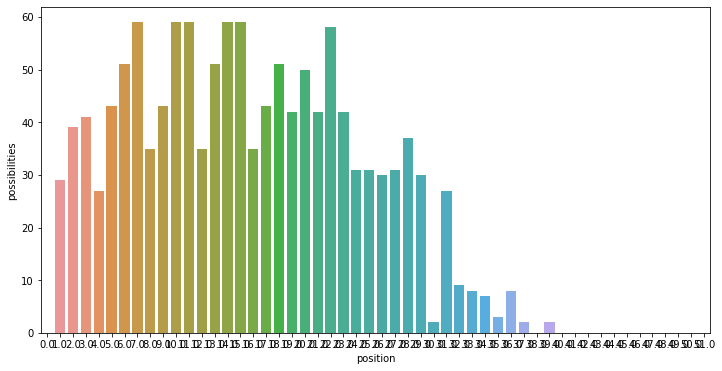

In [185]:
game.plot_heat_map_for_position_with_one_change(24,33)

,position,possibilities
0,0.0,0.0
1,1.0,91.0
2,2.0,110.0
3,3.0,114.0
4,4.0,75.0


The probability for one change of 11,8 is 3.76%


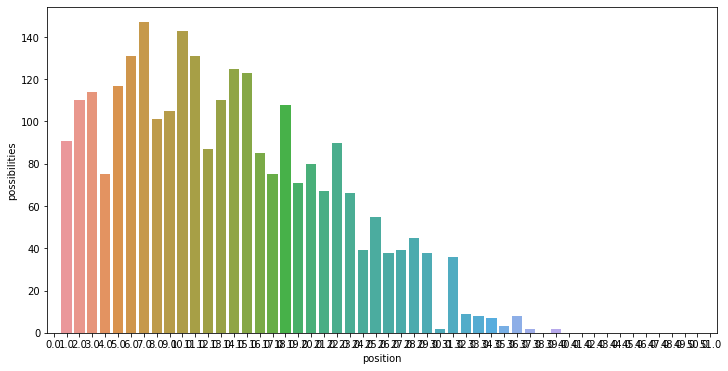

In [186]:
game.plot_heat_map_for_position_with_one_change(11,8)


The probability for 24,33 is 0.03%


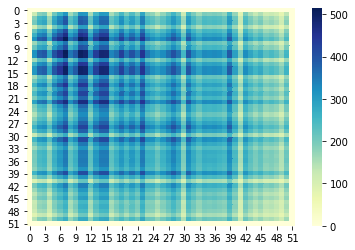

In [187]:
np.random.seed(543354)

board = Board()
game = Game(board)
for turn in range(28):
  game.next_turn()

game.plot_heat_map_for_position(24,33)

,position,possibilities
0,0.0,0.0
1,1.0,182.0
2,2.0,237.0
3,3.0,248.0
4,4.0,171.0


The probability for one change of 24,33 is 1.77%


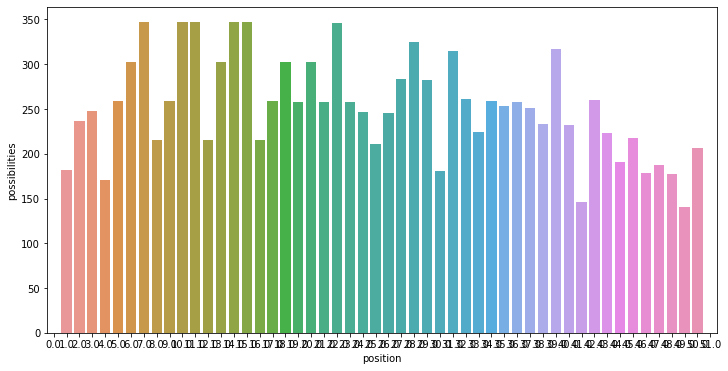

In [188]:
game.plot_heat_map_for_position_with_one_change(24,33)


The probability for 24,33 is 0.04%


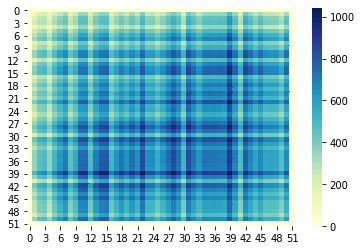

In [189]:
np.random.seed(543354)

board = Board()
game = Game(board)
for turn in range(56):
  game.next_turn()

game.plot_heat_map_for_position(24,33)

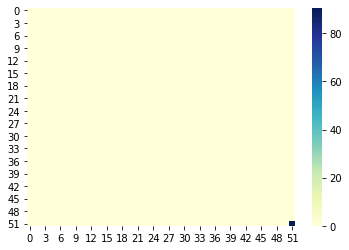

In [193]:
game.plot_heat_map()

,position,possibilities
0,0.0,0.0
1,1.0,280.0
2,2.0,381.0
3,3.0,402.0
4,4.0,280.0


The probability for one change of 24,33 is 2.00%


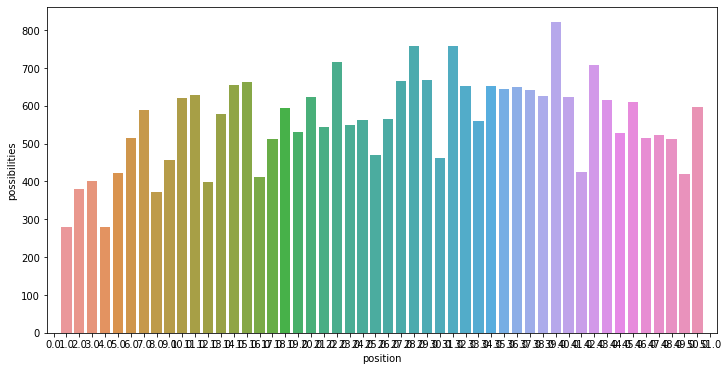

In [190]:
game.plot_heat_map_for_position_with_one_change(24,33)


,position,possibilities
0,0.0,0.0
1,1.0,208.0
2,2.0,304.0
3,3.0,323.0
4,4.0,213.0


The probability for one change of 41,20 is 2.34%


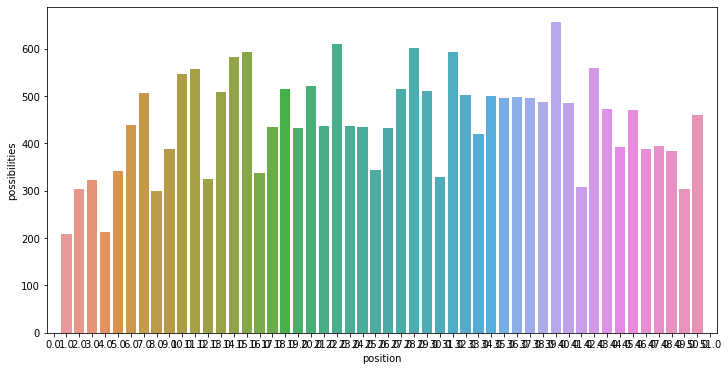

In [191]:
game.plot_heat_map_for_position_with_one_change(41,20)


,position,possibilities
0,0.0,0.0
1,1.0,328.0
2,2.0,431.0
3,3.0,452.0
4,4.0,332.0


The probability for one change of 20,41 is 1.62%


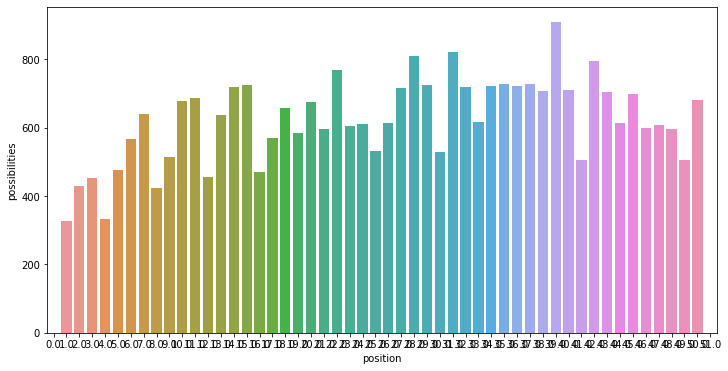

In [192]:
game.plot_heat_map_for_position_with_one_change(20,41)
